In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df_DEV = pd.read_csv('DEV_BI.txt', sep='|', header=0, encoding='ISO-8859-1', error_bad_lines=False)

In [2]:
def slice(d):
    if (d < datetime(year=1994, month=1, day=1)) | (d >= datetime(year=2017, month=2, day=1)):
        return True
    else:
        return False

In [3]:
df_DEV['DATE_RECEIVED'] = pd.to_datetime(df_DEV['DATE_RECEIVED'])
df_DEV['filter'] = df_DEV['DATE_RECEIVED'].map(slice)
df_DEV = df_DEV.loc[df_DEV['filter']==False, :]
del df_DEV['filter']
df_DEV.head()

,MDR_REPORT_KEY,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,DEVICE_SEQUENCE_NO,DATE_RECEIVED,BRAND_NAME,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_ADDRESS_1,...,MODEL_NUMBER,CATALOG_NUMBER,LOT_NUMBER,OTHER_ID_NUMBER,DEVICE_OPERATOR,DEVICE_AVAILABILITY,DATE_RETURNED_TO_MANUFACTURER,DEVICE_REPORT_PRODUCT_CODE,DEVICE_AGE_TEXT,DEVICE_EVALUATED_BY_MANUFACTUR
0,140208,136879.0,Y,V,1.0,1997-12-22,MAMMARY PROSTHESIS,BREAST IMPLANT,AMERICAN HEYER-SCHULTE,600 PINE AVE.,...,UNK,UNK,UNK,NaN,0HP,N,NaN,FTR,UNKNOWN,R
1,140205,136876.0,Y,U,1.0,1997-12-22,MAMMARY PROSTHESIS,BREAST IMPLANT,AMERICAN HEYER-SCHULTE,600 PINE AVE.,...,UNK,UNK,UNK,NaN,0HP,N,NaN,FTR,UNKNOWN,R
2,140202,136873.0,Y,U,1.0,1997-12-22,MAMMARY PROSTHESIS,BREAST IMPLANT,AMERICAN HEYER-SCHULTE,600 PINE AVE.,...,UNK,UNK,UNK,NaN,0HP,N,NaN,FTR,UNKNOWN,R
3,140199,136870.0,Y,U,1.0,1997-12-22,GEL-FILLED MAMMARY PROSTHESIS,BREAST IMPLANT,AMERICAN HEYER-SCHULTE,600 PINE AVE.,...,STYLE 7000,350-7250,214566,NaN,0HP,N,NaN,FTR,UNKNOWN,R
4,140196,136867.0,Y,U,1.0,1997-12-22,GEL-FILLED MAMMARY PROSTHESIS,BREAST IMPLANT,AMERICAN HEYER-SCHULTE,600 PINE AVE.,...,STYLE 7000,350-7325,172100,NaN,0HP,N,NaN,FTR,UNKNOWN,R


In [4]:
col_name = list(df_DEV.columns.values)
line_num = df_DEV.shape[0]
print('In the device data related to breast implant, there are {} records in total.\n'.format(line_num))
for b in col_name:
    n = df_DEV[b].isnull().sum()
    print(b, 'missing :', n, 'out of', line_num, ',', n/line_num)

In the device data related to breast implant, there are 27594 records in total.

MDR_REPORT_KEY missing : 0 out of 27594 , 0.0
DEVICE_EVENT_KEY missing : 3103 out of 27594 , 0.112451982315
IMPLANT_FLAG missing : 3103 out of 27594 , 0.112451982315
DATE_REMOVED_FLAG missing : 5084 out of 27594 , 0.184242951366
DEVICE_SEQUENCE_NO missing : 0 out of 27594 , 0.0
DATE_RECEIVED missing : 0 out of 27594 , 0.0
BRAND_NAME missing : 1673 out of 27594 , 0.060629122273
GENERIC_NAME missing : 2729 out of 27594 , 0.0988983112271
MANUFACTURER_D_NAME missing : 1877 out of 27594 , 0.0680220337755
MANUFACTURER_D_ADDRESS_1 missing : 7321 out of 27594 , 0.265311299558
MANUFACTURER_D_ADDRESS_2 missing : 23880 out of 27594 , 0.86540552294
MANUFACTURER_D_CITY missing : 4625 out of 27594 , 0.167608900486
MANUFACTURER_D_STATE_CODE missing : 12778 out of 27594 , 0.46307168225
MANUFACTURER_D_ZIP_CODE missing : 13185 out of 27594 , 0.477821265492
MANUFACTURER_D_ZIP_CODE_EXT missing : 26028 out of 27594 , 0.9432485

In [5]:
for b in col_name:
    n = df_DEV[b].nunique()
    print(b, 'unique value :', n)

MDR_REPORT_KEY unique value : 26544
DEVICE_EVENT_KEY unique value : 22738
IMPLANT_FLAG unique value : 3
DATE_REMOVED_FLAG unique value : 8
DEVICE_SEQUENCE_NO unique value : 12
DATE_RECEIVED unique value : 4384
BRAND_NAME unique value : 3299
GENERIC_NAME unique value : 2021
MANUFACTURER_D_NAME unique value : 970
MANUFACTURER_D_ADDRESS_1 unique value : 657
MANUFACTURER_D_ADDRESS_2 unique value : 143
MANUFACTURER_D_CITY unique value : 317
MANUFACTURER_D_STATE_CODE unique value : 31
MANUFACTURER_D_ZIP_CODE unique value : 232
MANUFACTURER_D_ZIP_CODE_EXT unique value : 97
MANUFACTURER_D_COUNTRY_CODE unique value : 23
MANUFACTURER_D_POSTAL_CODE unique value : 112
EXPIRATION_DATE_OF_DEVICE unique value : 437
MODEL_NUMBER unique value : 1805
CATALOG_NUMBER unique value : 2444
LOT_NUMBER unique value : 7792
OTHER_ID_NUMBER unique value : 850
DEVICE_OPERATOR unique value : 14
DEVICE_AVAILABILITY unique value : 5
DATE_RETURNED_TO_MANUFACTURER unique value : 1314
DEVICE_REPORT_PRODUCT_CODE unique v

Implant flag: whether the device implanted into human body


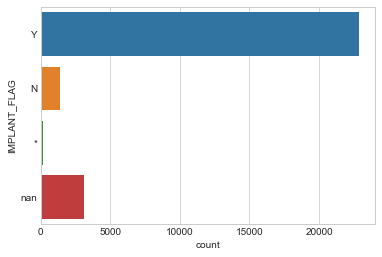

In [21]:
df_DEV['IMPLANT_FLAG'] = df_DEV['IMPLANT_FLAG'].astype(str)
sns.set_style("whitegrid")
print('Implant flag: whether the device implanted into human body')
sns.countplot(y='IMPLANT_FLAG', data=df_DEV)

Date removed flag:
M or Y = print Date;
U = Unknown;
A = Not available;
I = No information at this time;
M = Month and year provided only, day defaults to 01;
Y = Year provided only, day defaulted to 01, month defaulted to January


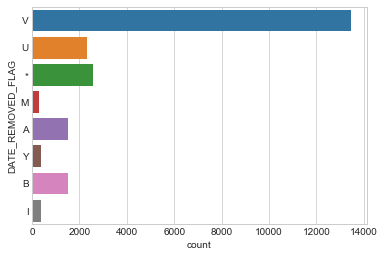

In [24]:
print("""Date removed flag:
M or Y = print Date;
U = Unknown;
A = Not available;
I = No information at this time;
M = Month and year provided only, day defaults to 01;
Y = Year provided only, day defaulted to 01, month defaulted to January""")
sns.countplot(y='DATE_REMOVED_FLAG', data=df_DEV)

Date sequence number: totally 12 types; mainly 1.0


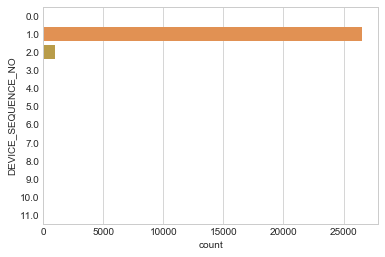

In [26]:
print('Date sequence number: totally 12 types; mainly 1.0')
sns.countplot(y='DEVICE_SEQUENCE_NO', data=df_DEV)

In [5]:
print('Brand name: showing top 30')
df_DEV['BRAND_NAME'].value_counts().nlargest(30)

Brand name: showing top


UNK                                              2571
MAMMARY PROSTHESIS                               1571
PIP, INC.                                        1132
*                                                1123
HUTCHISON                                        1085
GEL-FILLED MAMMARY PROSTHESIS                    1069
SILASTIC MAMMARY IMPLANT                          785
MENTOR                                            748
BREAST IMPLANT                                    661
MCGHAN                                            486
SILICONE BREAST IMPLANT                           469
COMBINATION GEL-INFLATABLE MAMMARY PROSTHESIS     464
UNKNOWN                                           332
INFLATABLE MAMMARY PROSTHESIS                     330
HUTCHISON SALINE FILL MAMMARY IMPLANT             322
DOW CORNING                                       309
GEL FILLED MAMMARY IMPLANT                        267
SURGITEK                                          251
SMOOTH HIGH PROFILE SALINE P

In [6]:
print('Generic name: showing top 30')
df_DEV['GENERIC_NAME'].value_counts().nlargest(30)

Generic name: showing top 30


BREAST IMPLANT                                                      7084
MAMMARY IMPLANT, GEL-FILLED                                         1760
MAMMARY PROSTHESIS                                                  1384
SALINE BREAST IMPLANT                                               1296
BREAST IMPLANTS                                                      895
SILICONE BREAST IMPLANT                                              847
MAMMARY IMPLANT                                                      805
*                                                                    750
SILICONE BREAST IMPLANTS                                             675
SALINE MAMMARY                                                       673
MAM IMP GEL-FILLED                                                   453
UNK                                                                  413
SALINE BREAST IMPLANTS                                               328
POLYURETHANE-COVERED MAMMARY IMPLANT               

In [7]:
print('Model number: showing top 30')
df_DEV['MODEL_NUMBER'].value_counts().nlargest(30)

Model number: showing top 30


UNK               6013
*                 3340
UNKNOWN            956
ROUND SMOOTH       892
TEXTURED           469
IMPHY-TEXTURED     455
STYLE 7000         448
NI                 279
IMPHY-SMOOTH       233
STYLE 168          221
STYLE 6000         160
SMOOTH             159
STYLE 2100         122
ROUND, SMOOTH      121
STYLE 468          105
STYLE 1600          93
STYLE 5000          89
STYLE 68            71
STYLE 76            65
SMOOTH, LOW         62
STYLE 2000          62
168                 58
2600 SILTEX         54
SMOOTH ROUND        52
ROUND TEXTURED      50
SMOOTH, HIGH        50
STYLE 1800          46
SMOOTH. LOW         45
STYLE 2200          40
STYLE 80            37
Name: MODEL_NUMBER, dtype: int64

In [8]:
print('Catalogue number: showing top 30')
df_DEV['CATALOG_NUMBER'].value_counts().nlargest(30)

Catalogue number: showing top 30


UNK                       7082
*                         3069
UNKNOWN                    898
NI                         291
HSL-0340                   247
HSL-0300                   164
HSL-0380                   162
HSL-0420                   159
27-168XXX                  127
UNK MAMMARY IMPLANT        117
UNK GEL BREAST IMPLANT     103
350-1640                    90
27-468XXX                   83
350-1650                    82
350-7250                    76
350-7225                    75
354-2670                    70
354-2650                    63
HSL-0270                    61
354-2660                    58
360-7275                    58
350-3330                    57
354-2640                    57
350-1660                    55
360-7225                    52
HSL-0460                    51
350-7200                    50
350-7275                    49
354-2645                    49
350-1630                    47
Name: CATALOG_NUMBER, dtype: int64

In [9]:
print('Lot number: showing top 30')
df_DEV['LOT_NUMBER'].value_counts().nlargest(30)

Lot number: showing top 30


UNK              7086
*                3187
UNKNOWN           880
NI                679
96236              17
98214              17
96177              15
96156              14
96138              14
96136              13
96188              13
96145              13
96139              13
98264              12
96161              12
96163              12
98230              12
98322              11
96172              11
96148              10
98204              10
96106              10
96230              10
96144              10
S2046/1             9
98302               9
NOT AVAILABLE       9
98226               9
96134               8
96178               8
Name: LOT_NUMBER, dtype: int64

Device operator code: (reference: https://www.fda.gov/MedicalDevices/DeviceRegulationandGuidance/PostmarketRequirements/ReportingAdverseEvents/ucm127891.htm#deviceOperator)
0HP = HEALTH PROFESSIONAL
0LP = LAY USER/PATIENT
UNK = UNKNOWN
* = INVALID DATA
000/0 = OTHER
NI = NO INFORMATION
300 = OTHER CAREGIVERS
001/1 = PHYSICIAN
100 = OTHER HEALTH CARE PROFESSIONAL
305 = PATIENT
002 = NURSE
306 = PATIENT FAMILY MEMBER OR FRIEND


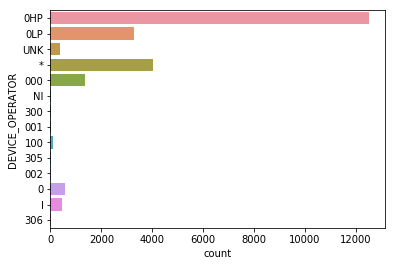

In [11]:
print("""Device operator code: (reference: https://www.fda.gov/MedicalDevices/DeviceRegulationandGuidance/PostmarketRequirements/ReportingAdverseEvents/ucm127891.htm#deviceOperator)
0HP = HEALTH PROFESSIONAL
0LP = LAY USER/PATIENT
UNK = UNKNOWN
* = INVALID DATA
000/0 = OTHER
NI = NO INFORMATION
300 = OTHER CAREGIVERS
001/1 = PHYSICIAN
100 = OTHER HEALTH CARE PROFESSIONAL
305 = PATIENT
002 = NURSE
306 = PATIENT FAMILY MEMBER OR FRIEND""")
sns.countplot(y='DEVICE_OPERATOR', data=df_DEV)

Device availability:
Y = Yes
N = No
R = Device was returned to manufacturer
* = No answer provided


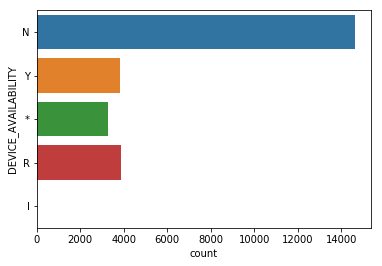

In [12]:
print("""Device availability:
Y = Yes
N = No
R = Device was returned to manufacturer
* = No answer provided""")
sns.countplot(y='DEVICE_AVAILABILITY', data=df_DEV)

In [13]:
print('Device report product code: showing top 30')
df_DEV['DEVICE_REPORT_PRODUCT_CODE'].value_counts().nlargest(30)

Device report product code: showing top 30


FTR    15300
FWM    11421
GEI       89
GAM       88
LCJ       80
OXF       73
FHW       51
NOU       34
MEB       31
GAN       27
HHS       16
FTM       16
GAR       14
GCY       12
MHX       12
MPN       11
MRD       10
IZH        9
LRO        8
FTL        7
JOS        6
LMH        6
NEW        6
GAD        5
BYI        5
LXH        5
NVN        5
FRN        5
FZP        4
MEH        4
Name: DEVICE_REPORT_PRODUCT_CODE, dtype: int64

In [14]:
print('Device age text: showing top 30')
df_DEV['DEVICE_AGE_TEXT'].value_counts().nlargest(30)

Device age text: showing top 30


UNKNOWN    6100
*          3032
DA         1070
2 YR        562
1 YR        422
4 YR        342
3 YR        328
10 YR       238
20 YR       212
15 YR       196
9 YR        181
8 YR        179
7 YR        178
12 YR       175
13 YR       173
14 YR       171
17 YR       144
11 YR       140
5 YR        140
6 YR        131
16 YR       125
18 YR       123
NO INFO     115
6 MO        102
19 YR        87
25 YR        82
22 YR        79
23 YR        68
21 YR        66
5 MO         42
Name: DEVICE_AGE_TEXT, dtype: int64

Device evaluated by manufactur:
Y = Yes
N = No
R = Device not returned to manufacturer
* = No answer provided


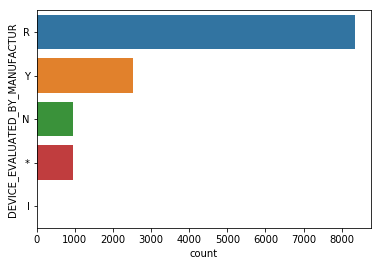

In [15]:
print("""Device evaluated by manufactur:
Y = Yes
N = No
R = Device not returned to manufacturer
* = No answer provided""")
sns.countplot(y='DEVICE_EVALUATED_BY_MANUFACTUR', data=df_DEV)